# Inequality in wage between men and women

In this project we seek to analyze the wages for men and women. 

We use data from Danmarks Statistikbank where we look at the wage for men and women in the years 2013 - 2021.

Dataset **wagemen.xlsx** shows the wages for men in different age groups. 
Dataset **wagewomen.xlsx** shows the wages for women in different age groups. 
Furthermore, we load and clean the dataset for GDP in Denmark for the period 2010-2022, so we are able to see if the development in women and men's wages is following the GDP trend. 


Imports and set magics:

In [21]:
# Importing modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
plt.style.use('seaborn-whitegrid')

import ipywidgets as widgets
from matplotlib_venn import venn2

import pydst
dst = pydst.Dst(lang='en')  

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load and clean data

We will be importing the three datasets manually - wagemen, wagewomen and gdp.

First we will import and clean the dataset for wages for men and afterwards clean the dataset for wages for women and the same for GDP. 

**Dataset for men's wages:**

In [22]:
# Loading dataset for men's wages and skipping the first two rows
wagemen = pd.read_excel('wagemen.xlsx', skiprows=2)

# Dropping 'Unnamed: 0' 'Unnamed: 1' 'Unnamed: 2' 'Unnamed: 3' 'Unnamed: 4'
drop_these = ['Unnamed: ' + str(num) for num in range(5)] 
wagemen.drop(drop_these, axis=1, inplace=True)
print(drop_these)

# Renaming variables
wagemen.rename(columns = {'Unnamed: 5':'age_intervals'}, inplace=True)

# Renaming the columns
col_dict = {}
for i in range(2013, 2021+1): 
    col_dict[str(i)] = f'wagemen{i}' 
col_dict
wagemen.rename(columns = col_dict, inplace=True)

# Showing the cleaned dataset
wagemen

['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


,age_intervals,wagemen2013,wagemen2014,wagemen2015,wagemen2016,wagemen2017,wagemen2018,wagemen2019,wagemen2020,wagemen2021
0,Alder i alt,309.21,312.75,315.84,318.39,324.98,334.30,340.88,346.28,352.15
1,Under 20 år,116.27,119.26,122.70,122.71,124.81,127.10,128.59,131.26,139.71
2,20-24 år,179.52,182.77,186.73,189.26,194.14,200.92,202.93,205.53,209.94
3,25-29 år,238.14,241.58,244.36,248.56,254.57,263.53,269.17,273.53,279.24
4,30-34 år,284.70,286.74,288.26,291.61,298.79,307.44,314.42,320.42,327.12
5,35-39 år,318.20,320.50,323.47,326.31,333.20,342.00,347.92,352.83,358.49
6,40-44 år,337.04,341.27,346.18,349.73,356.58,366.24,372.72,377.34,383.26
7,45-49 år,343.65,347.78,352.39,357.63,367.18,377.95,386.38,392.18,398.22
8,50-54 år,336.81,341.22,347.06,353.69,362.64,374.81,385.04,390.88,398.58
9,55-59 år,327.33,332.27,336.70,342.28,350.00,361.74,371.40,379.90,388.47


In [23]:
# We know change the dataset from a wide dataset to a long dataset
wagemen_long = pd.wide_to_long(wagemen, stubnames='wagemen', i='age_intervals', j='year')
wagemen_long.head(10)

,,wagemen
age_intervals,year,
Alder i alt,2013,309.21
Under 20 år,2013,116.27
20-24 år,2013,179.52
25-29 år,2013,238.14
30-34 år,2013,284.70
35-39 år,2013,318.20
40-44 år,2013,337.04
45-49 år,2013,343.65
50-54 år,2013,336.81


**Dataset for women's wages:**

In [24]:
# Loading dataset for women's wages and skipping the first two rows
wagewomen = pd.read_excel('wagewomen.xlsx', skiprows=2)

# Dropping 'Unnamed: 0' 'Unnamed: 1' 'Unnamed: 2' 'Unnamed: 3' 'Unnamed: 4'
drop_these = ['Unnamed: ' + str(num) for num in range(5)] 
wagewomen.drop(drop_these, axis=1, inplace=True)
print(drop_these)

# Renaming variables
wagewomen.rename(columns = {'Unnamed: 5':'age_intervals'}, inplace=True)

# Renaming the columns
col_dict = {}
for i in range(2013, 2021+1): 
    col_dict[str(i)] = f'wagewomen{i}' 
col_dict
wagewomen.rename(columns = col_dict, inplace=True)

# Showing the cleaned dataset
wagewomen

['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


,age_intervals,wagewomen2013,wagewomen2014,wagewomen2015,wagewomen2016,wagewomen2017,wagewomen2018,wagewomen2019,wagewomen2020,wagewomen2021
0,Alder i alt,270.72,275.58,280.45,283.60,290.11,297.94,304.03,312.18,316.83
1,Under 20 år,117.71,120.68,123.34,122.21,124.53,128.04,131.86,135.80,143.56
2,20-24 år,162.92,166.21,168.62,171.49,175.59,180.75,183.43,188.22,191.80
3,25-29 år,229.47,233.84,238.45,241.88,247.55,253.33,258.32,265.24,269.96
4,30-34 år,266.14,271.25,276.03,278.93,285.57,291.77,297.66,306.50,312.26
5,35-39 år,279.79,284.76,290.93,295.52,302.59,309.95,315.80,324.53,329.08
6,40-44 år,285.87,291.24,297.68,302.51,309.80,318.10,324.72,333.97,339.84
7,45-49 år,288.30,293.39,299.32,304.88,313.24,321.94,329.77,338.43,344.87
8,50-54 år,284.18,289.11,294.85,300.68,309.67,320.18,327.92,336.76,343.19
9,55-59 år,282.09,286.76,291.17,296.24,303.28,311.93,319.44,329.06,335.66


**Dataset for GDP:**

In [25]:
# We know change the dataset from a wide dataset to a long dataset
wagewomen_long = pd.wide_to_long(wagewomen, stubnames='wagewomen', i='age_intervals', j='year')
wagewomen_long.head(10)

,,wagewomen
age_intervals,year,
Alder i alt,2013,270.72
Under 20 år,2013,117.71
20-24 år,2013,162.92
25-29 år,2013,229.47
30-34 år,2013,266.14
35-39 år,2013,279.79
40-44 år,2013,285.87
45-49 år,2013,288.30
50-54 år,2013,284.18


In [39]:
# Loading dataset for gsp and skipping the first two rows
gdp = pd.read_excel('GDP.xlsx', skiprows=2)

# Dropping 'Unnamed: 0' 
drop_these = ['Unnamed: ' + str(num) for num in range(1)] 
gdp.drop(drop_these, axis=1, inplace=True)
print(drop_these)

# Renaming the columns
col_dict = {}
for i in range(2010, 2022+1):
    col_dict[str(i)] = f'gdp{i}' 
col_dict
gdp.rename(columns = col_dict, inplace=True)

# Renaming variable
gdp.rename(columns = {'Unnamed: 1':'GDP'}, inplace=True)

# Only showing the first coloumn
gdp = gdp.iloc[[0]]

# Showing the cleaned dataset
gdp

['Unnamed: 0']


,GDP,gdp2010,gdp2011,gdp2012,gdp2013,gdp2014,gdp2015,gdp2016,gdp2017,gdp2018,gdp2019,gdp2020,gdp2021,gdp2022
0,"2010-priser, kædede værdier",1810926.0,1835134.0,1839290.0,1856457.0,1886520.0,1930714.0,1993384.0,2049632.0,2090410.0,2121630.0,2079312.0,2180277.0,2263543.0


In [40]:
# We know change the dataset from a wide dataset to a long dataset
gdp_long = pd.wide_to_long(gdp, stubnames='gdp', i='GDP', j='year')
gdp_long.head(10)

gdp
GDP                         year           
2010-priser, kædede værdier 2010  1810926.0
                            2011  1835134.0
                            2012  1839290.0
                            2013  1856457.0
                            2014  1886520.0
                            2015  1930714.0
                            2016  1993384.0
                            2017  2049632.0
                            2018  2090410.0
                            2019  2121630.0

## Explorering each data set

To be able to make further analysis we start of by doing an interactive plot for men and women's wages for the years 2013 to 2021. We construct an interactive plot where it is possible to select different age intervals.

**Interactive plot for men** :

In [28]:
# We start of by resetting the index
wagemen_long = wagemen_long.reset_index()
wagemen_long.loc[wagemen_long.age_intervals == 'Alder i alt', :]

,age_intervals,year,wagemen
0,Alder i alt,2013,309.21
11,Alder i alt,2014,312.75
22,Alder i alt,2015,315.84
33,Alder i alt,2016,318.39
44,Alder i alt,2017,324.98
55,Alder i alt,2018,334.30
66,Alder i alt,2019,340.88
77,Alder i alt,2020,346.28
88,Alder i alt,2021,352.15


In [111]:
# Defining our function to construct the interactive plot
def plot_men(df, age_intervals): 
    I = df['age_intervals'] == age_intervals
    ax=df.loc[I,:].plot(x='year', y='wagemen', style='-o', legend=False)
    ax.xaxis.set_ticks(np.arange(2013, 2022, 1))
    ax.set_ylabel('wage')
    ax.set_title('Interactive plot for different age groups for men\'s wage')

In [112]:
# Plotting men's wages
widgets.interact(plot_men, 
    df = widgets.fixed(wagemen_long),
    age_intervals = widgets.Dropdown(description='Age groups', 
                                    options=wagemen_long.age_intervals.unique(), 
                                    value='Alder i alt')
); 

interactive(children=(Dropdown(description='Age groups', options=('Alder i alt', 'Under 20 år', '20-24 år', '2…

From the interactive plot above we see that most age groups follow an almost linear trend which is increasing over the years. However, we notice that the age group "under 20 years" stagnate from 2015 to 2016. Furthermore, we see that the age group "60 years and above" are rather flat from 2013 to 2016, but afterwards increases dramatically until 2021.

**Interactive plot for women** :

In [31]:
# We start of by resetting the index
wagewomen_long = wagewomen_long.reset_index()
wagewomen_long.loc[wagewomen_long.age_intervals == 'Alder i alt', :]

,age_intervals,year,wagewomen
0,Alder i alt,2013,270.72
11,Alder i alt,2014,275.58
22,Alder i alt,2015,280.45
33,Alder i alt,2016,283.60
44,Alder i alt,2017,290.11
55,Alder i alt,2018,297.94
66,Alder i alt,2019,304.03
77,Alder i alt,2020,312.18
88,Alder i alt,2021,316.83


In [115]:
# Defining our function to construct the interactive plot
def plot_women(df, age_intervals): 
    I = df['age_intervals'] == age_intervals
    ax=df.loc[I,:].plot(x='year', y='wagewomen', style='-o', legend=False)
    ax.xaxis.set_ticks(np.arange(2013, 2022, 1))
    ax.set_ylabel('wage')
    ax.set_title('Interactive plot for different age groups for women\'s wage')

In [116]:
# Plotting women's wages
widgets.interact(plot_women, 
    df = widgets.fixed(wagewomen_long),
    age_intervals = widgets.Dropdown(description='Age groups', 
                                    options=wagewomen_long.age_intervals.unique(), 
                                    value='Alder i alt')
); 

interactive(children=(Dropdown(description='Age groups', options=('Alder i alt', 'Under 20 år', '20-24 år', '2…

From the figure above we see that the overall tendency is increasing. For the age group "Under 20 år" we see a considerable drop in the wages for women for the period 2015 to 2016. Furthermore, the rest of the age groups are following a rather linear increasing trend. 

# Merge data sets

We start off by merging the two wage datasets.

In [60]:
# Merging the two wage datasets in year and age intervals
mergedwage = pd.merge(wagewomen_long, wagemen_long, how='left', on=['year', 'age_intervals'])
mergedwage.head(10)

,age_intervals,year,wagewomen,wagemen
0,Alder i alt,2013,270.72,309.21
1,Under 20 år,2013,117.71,116.27
2,20-24 år,2013,162.92,179.52
3,25-29 år,2013,229.47,238.14
4,30-34 år,2013,266.14,284.70
5,35-39 år,2013,279.79,318.20
6,40-44 år,2013,285.87,337.04
7,45-49 år,2013,288.30,343.65
8,50-54 år,2013,284.18,336.81
9,55-59 år,2013,282.09,327.33


We use left-join since we would look to include everything in the merged wage dataset, but we only want to include the years in the gdp dataset that are in both datasets (2013-2021).

In [59]:
# Merging the dataset above for men and women's wages and gdp
mergedall = pd.merge(mergedwage, gdp_long, how='left', on=['year'])
mergedall.head(10)

,age_intervals,year,wagewomen,wagemen,gdp
0,Alder i alt,2013,270.72,309.21,1856457.0
1,Under 20 år,2013,117.71,116.27,1856457.0
2,20-24 år,2013,162.92,179.52,1856457.0
3,25-29 år,2013,229.47,238.14,1856457.0
4,30-34 år,2013,266.14,284.70,1856457.0
5,35-39 år,2013,279.79,318.20,1856457.0
6,40-44 år,2013,285.87,337.04,1856457.0
7,45-49 år,2013,288.30,343.65,1856457.0
8,50-54 år,2013,284.18,336.81,1856457.0
9,55-59 år,2013,282.09,327.33,1856457.0


A left join will keep all observations in the merged wage dataset and subset only from gdp. 

# Analysis

We start off by creating a summary table for men and women's wage in the given age intervals, where we look at the mean, std, min, max and the three fractils (25%, 50% and 75%).

In [81]:
mergedall.groupby(['age_intervals'])['wagemen', 'wagewomen'].describe().head(11)

/var/folders/3w/n1_fmpsx3tx3kcb_y3k42wcw0000gp/T/ipykernel_44551/2550788501.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mergedall.groupby(['age_intervals'])['wagemen', 'wagewomen'].describe().head(11)


wagemen                                                 \
                   count        mean        std     min     25%     50%   
age_intervals                                                             
20-24 år             9.0  194.637778  10.736144  179.52  186.73  194.14   
25-29 år             9.0  256.964444  14.954017  238.14  244.36  254.57   
30-34 år             9.0  302.166667  15.784138  284.70  288.26  298.79   
35-39 år             9.0  335.880000  14.928299  318.20  323.47  333.20   
40-44 år             9.0  358.928889  16.651764  337.04  346.18  356.58   
45-49 år             9.0  369.262222  20.230117  343.65  352.39  367.18   
50-54 år             9.0  365.636667  22.657985  336.81  347.06  362.64   
55-59 år             9.0  354.454444  21.954299  327.33  336.70  350.00   
60 år og derover     9.0  347.885556  14.542423  332.62  336.20  342.87   
Alder i alt          9.0  328.308889  15.640777  309.21  315.84  324.98   
Under 20 år          9.0  125.823333   6.950716  116.27  122.70  124.81   

                                 wagewomen                                 \
                     75%     max     count        mean        std     min   
age_intervals                                                               
20-24 år          202.93  209.94       9.0  176.558889  10.098439  162.92   
25-29 år          269.17  279.24       9.0  248.671111  14.066995  229.47   
30-34 år          314.42  327.12       9.0  287.345556  15.907326  266.14   
35-39 år          347.92  358.49       9.0  303.661111  17.410921  279.79   
40-44 år          372.72  383.26       9.0  311.525556  18.935568  285.87   
45-49 år          386.38  398.22       9.0  314.904444  20.120489  288.30   
50-54 år          385.04  398.58       9.0  311.837778  21.306085  284.18   
55-59 år          371.40  388.47       9.0  306.181111  19.011290  282.09   
60 år og derover  358.13  371.62       9.0  310.231111  15.198572  290.56   
Alder i alt       340.88  352.15       9.0  292.382222  16.326514  270.72   
Under 20 år       128.59  139.71       9.0  127.525556   8.235412  117.71   

                                                  
                     25%     50%     75%     max  
age_intervals                                     
20-24 år          168.62  175.59  183.43  191.80  
25-29 år          238.45  247.55  258.32  269.96  
30-34 år          276.03  285.57  297.66  312.26  
35-39 år          290.93  302.59  315.80  329.08  
40-44 år          297.68  309.80  324.72  339.84  
45-49 år          299.32  313.24  329.77  344.87  
50-54 år          294.85  309.67  327.92  343.19  
55-59 år          291.17  303.28  319.44  335.66  
60 år og derover  298.74  307.44  319.71  334.36  
Alder i alt       280.45  290.11  304.03  316.83  
Under 20 år       122.21  124.53  131.86  143.56

In the table above ....

/var/folders/3w/n1_fmpsx3tx3kcb_y3k42wcw0000gp/T/ipykernel_44551/2577118963.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mergedall.groupby('year')['wagemen', 'wagewomen'].mean().plot(ax=ax,style='-o')


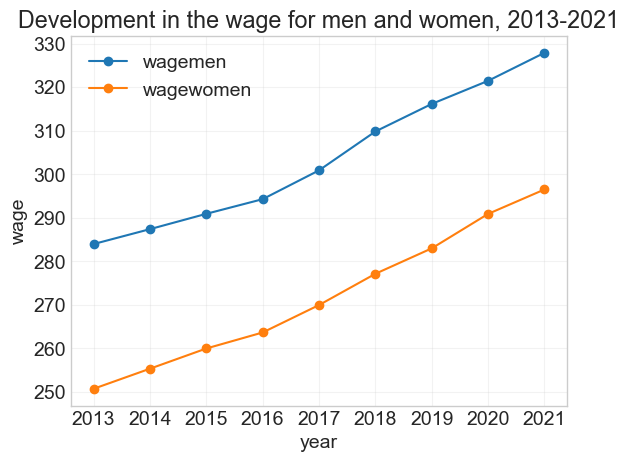

In [118]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

mergedall.groupby('year')['wagemen', 'wagewomen'].mean().plot(ax=ax,style='-o')

ax.xaxis.set_ticks(np.arange(2013, 2022, 1))
ax.set_ylabel('wage')
ax.set_title('Development in the wage for men and women, 2013-2021');

# Conclusion

ADD CONCISE CONLUSION.